In [ ]:
!pip install google-cloud-vision

{'responses': [{'textAnnotations': [{'locale': 'en', 'description': 'EXACT\nCOLOGUARD® ORDER\nEXACT SCIENCES LABORATORIES, LLC\nSCIENCES\n145 E Badger Rd, Ste 100, Madison, WI 53713\nREQUISITION FORM\np: 844-870-8870 | ExactLabs.com\nLABORATORIES\nStool-based DNA test with hemoglobin immunoassay component\nNPI: 1629407069 TIN: 463095174\nProvider & Order Information\nRecommended: type all Provider information.\nEditable, printable PDF available at exactlabs.com\nPROVIDER INFORMATION\nORDER INFORMATION\nHealth care\nHealthcare Organization Name:\nThis section is not intended to influence the medical judgment of an ordering\nprovider in determining whether this test is right for any particular patient. The\nfollowing codes are listed as a convenience. Ordering practitioners should report\nNOBEL CHEM\nthe diagnosis code(s) that best describes the reason for performing the test.\nProvider Name:\nICD-10 Code:\nGZ12.11 and Z12.12 (Encounter for screening for malignant\nneoplasm of colon [Z12

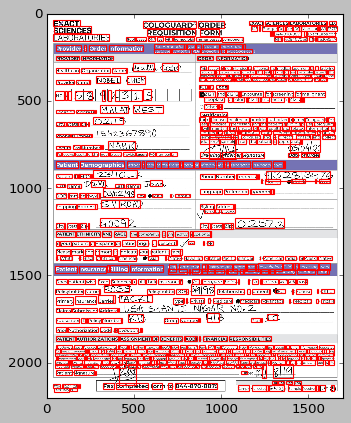

In [ ]:
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.patches as patches
plt.style.use('classic')
from PIL import Image
import numpy as np
import json
import requests
from io import BytesIO
"""Detects document features in an image."""
from google.cloud import vision

import os
os.environ["GOOGLE_APPLICATION_CREDENTIALS"]="/content/credentials.json"
import io
client = vision.ImageAnnotatorClient()


# [START vision_python_migration_document_text_detection]
with io.open("test3.jpeg", 'rb') as image_file:
    content = image_file.read()

image = vision.types.Image(content=content)

response = client.document_text_detection(image=image)

def convertCoord(js):
    length = js[1]["x"] - js[0]["x"]
    breadth = js[2]["y"] - js[0]["y"]
    return (length,breadth)
    
print(res)
res = res["responses"][0]["textAnnotations"][1:]
c=0
coord = []
colon = []
ques = []
radio = []
star = []
for r in res:
    c+=1
    co = r["boundingPoly"]["vertices"]
    l,b = convertCoord(co)
    s_x = co[0]["x"]
    s_y = co[0]["y"]
    rect = patches.Rectangle((s_x,s_y),int(l),int(b),linewidth=1,edgecolor='r',facecolor='none')
    desc = r["description"]
    if desc==":":
        colon.append([s_y,s_y+b,s_x,s_x+l,desc])
    elif desc=="?":
        ques.append([s_y,s_y+b,s_x,s_x+l,desc])
    elif set(desc).issubset(["O","o"]):
        radio.append([s_y,s_y+b,s_x,s_x+l,desc]) 
        coord.append([s_y,s_y+b,s_x,s_x+l,desc])
    elif set(desc).issubset(["*"]):
        star.append([s_y,s_y+b,s_x,s_x+l,desc]) 
        coord.append([s_y,s_y+b,s_x,s_x+l,desc])         
    else:
        coord.append([s_y,s_y+b,s_x,s_x+l,desc])
    ax.add_patch(rect)
print(c)
def findAllKeyValue(i):
    y_sorted = []
    for k in coord:
        if (i[0]+4)>=k[0] and (i[0]+4)<=k[1]:
            y_sorted.append(k)
    return y_sorted

def findAllKeyValueradio(i):
    y_sorted = []
    for k in coord:
        if (i[0]+4)>=k[0] and (i[0]+4)<=k[1]:
            y_sorted.append(k)
            y_sorted.append(i)
    return y_sorted    
fin=[]
for i in colon:
    output=[]
    filtered = findAllKeyValue(i)
    filtered.sort(key = lambda filtered: filtered[2])
    [output.append(j[4]) for j in filtered]
    fin.append(output)
    print([j[4] for j in filtered])
for i in ques:
    output=[]
    filtered=findAllKeyValue(i)
    filtered.sort(key = lambda filtered: filtered[2])
    [output.append(j[4]) for j in filtered]
    fin.append(output)
    print([j[4] for j in filtered])
for i in radio:
    output=[]
    filtered=findAllKeyValueradio(i)
    filtered.sort(key = lambda filtered: filtered[2])
    [output.append(j[4]) for j in filtered]
    fin.append(output)
    print([j[4] for j in filtered])
for i in star:
    output=[]
    filtered=findAllKeyValueradio(i)
    filtered.sort(key = lambda filtered: filtered[2])
    [output.append(j[4]) for j in filtered]
    fin.append(output)
    print([j[4] for j in filtered])     

print(output)
print(fin)    

In [ ]:
priorauthcode=""#absent in form
providerphno=""#absentinOCR
claimssubmissionaddress=""#absent inOCR
provideraddress=""
providercity=""
estobillinsurance="Yes"
securefaxno=""
providersign="No"
dateorder=""
patshippingaddress=""
patbillingaddress=""
shipzip=""
billzip=""
lpref=""
lhdescent=""
ethnicity=""
picarrier=""
itype=""
policyhname=""
policyholderDOB=""
relationtopat=""
proname=""
subscriberid=""
grpnumber=""
plan=""
daterecieved=""
patfname=""
patlname=""
patid=""
patphno=""
phstat="Home"
##patient DOB nand Sex
keydob="DOB(mm/dd/yyyy)"
patdob=""
patsex=""
key = "HealthcareOrganizationName"
HON=""
##NPI#
npi=""

for x in fin:
  if set(["Prior","Authorization","Code"]).issubset(x):
    priorauthcode=''.join(x[(x.index(")")+1):])
  if set(["Phone","Number","required","HIPPA"]).issubset(x):
    providerphno=''.join(x[(x.index("Number")+1):x.index("required")])
  if set(['Claims', 'Submission', 'Address']).issubset(x):
    claimssubmissionaddress=''.join(x[(x.index("Address")+1):])  
  if set(['Secure','Fax','Number','*']).issubset(x):
    dateorder=x[-1]
    if x[-2].isnumeric():
      securefaxno=x[-2]
    else:
      providersign="Yes"
      securefaxno=x[-3]
  if set(['Shipping','Address']).issubset(x):
    for j in x:
      if "Bi" in j and "ing" in j:
        id = x.index(j)
    patshippingaddress=''.join(x[2:id])
    patbillingaddress=''.join(x[(id+2):])
  if x.count("City")==2 and x.count("Zip")==2:
    c=0
    for i in range(0,len(x)):
      if x[i]=="Zip":
        if c==0:
          temp=x[(i+1):]
          shipzip=''.join(temp[:temp.index("City")])
          c=c+1
        else:
          billzip=''.join(x[i+1:])  
  if set(["Language","Preference","optional"]).issubset(x):
    lpref=''.join(x[(x.index("optional")+2):])
  if set(["Location","Address"]).issubset(x):
    provideraddress=''.join(x[(x.index("Address")+1):])
  if set(["City","State","Zip","test"]).issubset(x):
    providercity=''.join(x[(x.index("Zip")+1):x.index("test")]) 
  if set(["Exact","Sciences","bill","insurance","Yes"]).issubset(x):
    if set(x[x.index("No")-1]).issubset(["O","o"])==False:
      estobillinsurance="No"
  if set(["Hispanic","Latino","descent"]).issubset(x):
     if x[x.index("descent")+1]=="Yes":
       lhdescent= str(x[x.index("descent")+1])
     else:
       lhdescent="No"
  if set(["White","Black","African","American","Indian"]).issubset(x):
    if x[0] =="White":
      ethnicity="White"
    if set(x[x.index("Black")-1]).issubset(["O","o"])==False:
      ethinicity=''.join(x[x.index("Black"):(x.index("African")+2)])
    if set(x[x.index("Native")-1]).issubset(["O","o"])==False: 
      ethinicity=''.join(x[x.index("Black"):(x.index("Islander")+1)]) 
    if set(x[x.index("Indian")-2]).issubset(["O","o"])==False:
      ethinicity=''.join(x[(x.index("Indian")-1):])  
    if set(x[x.index("Asian")-1]).issubset(["O","o"])==False: 
      ethnicity="Asian"
  if set(["Primary","Insurance","Carrier","Type"]).issubset(x):
    picarrier=''.join(x[3:x.index("Type")])
    temp=x[x.index("Type")+1:]
    i=0
    while(True):
      if(set(temp[i]).issubset(["O","o"])):
        i=i+2
      else:
        itype=temp[i]
        if not set(temp[i+1]).issubset(["O","o"]):
          itype=itype+temp[i+1]  
        break
      if i >= len(temp):
        break
  if set(["Policyholder","Name","DOB","Relationship","patient"]).issubset(set(x)):
    policyhname=''.join(x[2:(x.index("DOB")-1)])
    policyholderDOB=''.join(x[x.index("DOB")+1:x.index("Relationship")])
    temp=x[x.index("patient")+1:]
    if set(temp[temp.index("Spouse")-1]).issubset(["O","o"])==False:
      relationtopat="Spouse"
    if set(temp[temp.index("Other")-1]).issubset(["O","o"])==False:
      relationtopat="Other"
    else:
      relationtopat="Self"     
  if set(["Provider","Name"]).issubset(set(x)):
    proname = ''.join(x[2:x.index("the")])
  if set(["Subscriber","ID","/","Policy","Number","Group","Plan"]).issubset(set(x)):
    subscriberid=''.join(x[5:x.index("Group")])
    grpnumber=''.join(x[(x.index("Group")+2):x.index("Plan")])
    temp = x[(x.index("Plan")+1):] 
    plan=''.join(temp)
  if "Sample" in x and "Collected" in x and "Received" in x:
    daterecieved=''.join(x[x.index("Received")+1:])
  if "First" in x and "Last" in x and "Name" in x:
    patfname=''.join(x[2:x.index("Last")])
    patlname =''.join(x[(x.index("Last")+2):(x.index("Last")+3)])
  if "Patient" in x and "ID" in x and '/' in x and 'MRN' in x and "Phone" in x and "Number" in x and "(" in x and "required" in x:
    patid=''.join(x[x.index("MRN")+1:x.index("Phone")])
    patphno=''.join(x[x.index(")")+1:x.index(")")+2])
  if set(["Home","Mobile","Work"]).issubset(x):
    if set(x[x.index("Mobile")-1]).issubset(["O","o"])==False:
      phstat="Mobile"
    if set(x[x.index("Work")-1]).issubset(["O","o"])==False:
      phstat="Work" 
  if "DOB" in x and "Sex" in x and "Language" in x:
    if ''.join(x[:8])==keydob:
      patdob=''.join(x[8:x.index("Sex")])
    sdata=x[x.index("Sex")+1:x.index("Language")]
    if sdata[0] == "Male":
      patsex="Male"
    else:
      patsex="Female"
  if ''.join(x[:3])==key:
     HON = ''.join(x[3:(x.index("This"))])
  if x[0]=="NPI" and x[1]=="#":
    npi = ''.join(x[2:x.index("GZ12.11")])
  if x[0]=="NPI#":
    npi = ''.join(x[1:])
print(npi)  
print(HON)       
print(patdob,patsex)     
print(patid,patphno,phstat) 
    
print(patfname,patlname) 
print(daterecieved)  
print(subscriberid,grpnumber,plan) 
print(proname) 

print(policyhname,policyholderDOB,relationtopat)        
print(picarrier,itype)          
print(lhdescent,ethnicity)     
print(estobillinsurance)   
print(provideraddress,providercity)       

        
print(priorauthcode,providerphno,claimssubmissionaddress,securefaxno,providersign,dateorder,patshippingaddress,patbillingaddress,shipzip,billzip,lpref) 


518923115
Healthcare
03/02/98 Male
2311OLK 9132813476 Mobile
Damn John
4/420
KIO HIB 10
NOBELCHEM
Ross 514198 Self
TACKL MedicareAdvantage
Yes Asian
Yes
MALADWEST 02115
   NAHIO Yes 05/04/20 S.V.ROAD  40092 02573 -


In [ ]:
#converting to json
import json
x={
   "Provider Information":{
     "Healthcare Organization Name":HON,
     "Provider Name":proname,
      "NPI #":npi,
      "Location Address":provideraddress,
      "City,State,Zip":providercity,
      "Phone Number":providerphno,
      "Secure Fax Number": securefaxno
   },
   "Order Information":{
       "ICD-10 codes":"",
       "Provider Signature":providersign,
       "Date of Order":dateorder
   },
   "Patient Demographics":{
       "Patient ID/MRN":patid,
       "First Name":patfname,
       "Last Name":patlname,
       "DOB (dd/mm/yyyy)":patdob,
       "Sex":patsex,
       "Phone Number(required)":patphno,
       "Phone Type":phstat,
       "Shipping Address":patshippingaddress,
       "Shipping Address City,State,Zip":shipzip,
       "Billing Address":patbillingaddress,
       "Billing Address City,State,Zip":billzip,
       "Language Preference(optional)":lpref,
       "Is your patient Hispanic or Latino origin or descent?":lhdescent,
       "Patient's race":ethnicity
   },
   "Patient Insurance/Billing Information":{
       "Does patient wish Exact Sciences to bill their insurance?":estobillinsurance,
       "PolicyHolder Name":policyhname,
       "PolicyHolder DOB":policyholderDOB,
       "Relationship to patient":relationtopat,
       "Primary Insurance Carrier":picarrier,
       "Insurance Carrier Type":itype,
       "Claims Submission Address":claimssubmissionaddress,
       "Subscriber ID/Policy Number":subscriberid,
       "Group Number":grpnumber,
       "Plan":plan,
       "Prior Authorization code(if available)":priorauthcode
   },
   "Timeline":{
      "Date received by ES Labs":daterecieved   
   }
}

out = json.dumps(x)
print(out)       


{"Provider Information": {"Healthcare Organization Name": "Healthcare", "Provider Name": "NOBELCHEM", "NPI #": "518923115", "Location Address": "MALADWEST", "City,State,Zip": "02115", "Phone Number": "", "Secure Fax Number": "NAHIO"}, "Order Information": {"ICD-10 codes": "", "Provider Signature": "Yes", "Date of Order": "05/04/20"}, "Patient Demographics": {"Patient ID/MRN": "2311OLK", "First Name": "Damn", "Last Name": "John", "DOB (dd/mm/yyyy)": "03/02/98", "Sex": "Male", "Phone Number(required)": "9132813476", "Phone Type": "Mobile", "Shipping Address": "S.V.ROAD", "Shipping Address City,State,Zip": "40092", "Billing Address": "", "Billing Address City,State,Zip": "02573", "Language Preference(optional)": "-", "Is your patient Hispanic or Latino origin or descent?": "Yes", "Patient's race": "Asian"}, "Patient Insurance/Billing Information": {"Does patient wish Exact Sciences to bill their insurance?": "Yes", "PolicyHolder Name": "Ross", "PolicyHolder DOB": "514198", "Relationship t

In [ ]:
!pwd

/content


In [ ]:
for page in response.full_text_annotation.pages:
    for block in page.blocks:
        print('\nBlock confidence: {}\n'.format(block.confidence))

        for paragraph in block.paragraphs:
            print('Paragraph confidence: {}'.format(
                paragraph.confidence))

            for word in paragraph.words:
                word_text = ''.join([
                    symbol.text for symbol in word.symbols
                ])
                print('Word text: {} (confidence: {})'.format(
                    word_text, word.confidence))

                for symbol in word.symbols:
                    print('\tSymbol: {} (confidence: {})'.format(
                        symbol.text, symbol.confidence))

if response.error.message:
    raise Exception(
        '{}\nFor more info on error messages, check: '
        'https://cloud.google.com/apis/design/errors'.format(
            response.error.message))
# [END vision_python_migration_document_text_detection]
# [END vision_fulltext_detection]

